# Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
calendar = pd.read_csv('calendar.csv',parse_dates=['date'],infer_datetime_format=True)
sales_train_evaluation = pd.read_csv('sales_train_evaluation.csv')
sell_prices = pd.read_csv('sell_prices.csv')

In [3]:
display(calendar.head(2))
display(calendar.tail(2))

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    object        
 8   event_type_1  162 non-null    object        
 9   event_name_2  5 non-null      object        
 10  event_type_2  5 non-null      object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [5]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [6]:
display(sales_train_evaluation.head(2))
display(sales_train_evaluation.tail(2))

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,2,0,5,4,0,2,2,5,1


In [7]:
sales_train_evaluation.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        30490 non-null  object
 1   item_id   30490 non-null  object
 2   dept_id   30490 non-null  object
 3   cat_id    30490 non-null  object
 4   store_id  30490 non-null  object
 5   state_id  30490 non-null  object
 6   d_1       30490 non-null  int64 
 7   d_2       30490 non-null  int64 
 8   d_3       30490 non-null  int64 
 9   d_4       30490 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.3+ MB


In [8]:
display(sell_prices.head(2))
display(sell_prices.tail(2))

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58


,store_id,item_id,wm_yr_wk,sell_price
6841119,WI_3,FOODS_3_827,11620,1.0
6841120,WI_3,FOODS_3_827,11621,1.0


In [9]:
sell_prices.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


# Let's check the data integrity

### calendar DF

In [10]:
calendar.isna().sum() # only the days with no event have null data

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [11]:
calendar.duplicated().sum() # no duplication

0

In [12]:
calendar_day_interval = [i.days for i in calendar.date-calendar.date.shift(1)]

print('calendar_day_interval list first 5 elements')
display(calendar_day_interval[:5])

print('\n')

print('len(calendar) = {}'.format(len(calendar)))
print('sum timedelta = {}'.format(sum(calendar_day_interval[1:]))) # no date skip

del calendar_day_interval

calendar_day_interval list first 5 elements


[nan, 1, 1, 1, 1]



len(calendar) = 1969
sum timedelta = 1968


Sum of the time delta = len-1 means that all of the date interval are at 1 days. Therefore, no day skip in the dataset.

### calendar DF is clean 

### check sales_train_evaluation df

In [13]:
sales_train_evaluation.isna().sum().sum() #no missing data. #so many columns I just do another .sum() to avoid the display overflow.

0

In [14]:
sales_train_evaluation.duplicated().sum() #no duplication

0

In [15]:
#col_list = list(sales_train_evaluation.columns)
day_list = list((sales_train_evaluation.columns)[6:])
day_list = [x.replace('d_','') for x in day_list]
day_list = [int(x) for x in day_list ]
day_list_interval = [day_list[i]-day_list[i-1] for i in range(len(day_list))]

print('day_list_interval list first 5 elements')
display(day_list_interval[:5])

print('\n')

print('len(day_list) = {}'.format(len(day_list)))
print('sum timedelta = {}'.format(sum(day_list_interval[1:]))) # no date skip

del day_list
del day_list_interval

day_list_interval list first 5 elements


[-1940, 1, 1, 1, 1]



len(day_list) = 1941
sum timedelta = 1940


Sum of the time delta = len-1 means that all of the date interval are at 1 days. Therefore, no day skip in the dataset.

### sales_train_evauation DF is clean 

### check sell_prices df

In [16]:
sell_prices.isna().sum() #no missing data

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [17]:
sell_prices.duplicated().sum() #no duplication

0

No need to check time skip in sell_prices since the price will be mapped in another table using wm_yr_wk as a key.

### Each dataset is clean.

# EDA

### Explore and trim the calendar DF first

In [18]:
# what do we have in the event types?

display(calendar['event_type_1'].unique())
display(calendar['event_type_2'].unique())

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

array([nan, 'Cultural', 'Religious'], dtype=object)

### There are 4 types of event 'Sporting', 'Cultural', 'National', 'Religious'.

In [19]:
# how many SNAP day are there?

snap_ca = sum(calendar['snap_CA']) 
snap_tx = sum(calendar['snap_TX'])
snap_wi = sum(calendar['snap_WI'])

print('snap_CA count = {} days or {} % of total days'.format(snap_ca,(snap_ca*100/len(calendar['date']))))
print('snap_TX count = {} days or {} % of total days'.format(snap_tx,(snap_tx*100/len(calendar['date']))))
print('snap_WI count = {} days or {} % of total days'.format(snap_wi,(snap_wi*100/len(calendar['date']))))

del snap_ca
del snap_tx
del snap_wi

snap_CA count = 650 days or 33.011681056373796 % of total days
snap_TX count = 650 days or 33.011681056373796 % of total days
snap_WI count = 650 days or 33.011681056373796 % of total days


### Interesting... they are havnig the same count. Let's check if thay occured at the same time so we could aggregate the snap column.

In [20]:
calendar.loc[calendar['snap_CA']==True]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,2016-06-06,11619,Monday,3,6,2016,d_1956,NaN,NaN,NaN,NaN,1,1,1
1956,2016-06-07,11619,Tuesday,4,6,2016,d_1957,Ramadan starts,Religious,NaN,NaN,1,1,0
1957,2016-06-08,11619,Wednesday,5,6,2016,d_1958,NaN,NaN,NaN,NaN,1,0,1
1958,2016-06-09,11619,Thursday,6,6,2016,d_1959,NaN,NaN,NaN,NaN,1,1,1


### SNAP period are differerent from one State to another, need to keep them all.

In [21]:
# create weekend_column to reduce footprint
calendar['wknd'] = int(0)
calendar.loc[calendar['wday'] <= 2, 'wknd'] = 1

calendar = calendar[['date','wm_yr_wk','wknd','d','event_type_1','event_type_2','snap_CA','snap_TX','snap_WI']]

In [22]:
calendar.tail()

,date,wm_yr_wk,wknd,d,event_type_1,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,0,d_1965,NaN,NaN,0,1,1
1965,2016-06-16,11620,0,d_1966,NaN,NaN,0,0,0
1966,2016-06-17,11620,0,d_1967,NaN,NaN,0,0,0
1967,2016-06-18,11621,1,d_1968,NaN,NaN,0,0,0
1968,2016-06-19,11621,1,d_1969,Sporting,Cultural,0,0,0


In [23]:
calendar[~calendar['event_type_2'].isna()] # event type 2 means that there are multiple events in a day

,date,wm_yr_wk,wknd,d,event_type_1,event_type_2,snap_CA,snap_TX,snap_WI
85,2011-04-24,11113,1,d_86,Religious,Cultural,0,0,0
827,2013-05-05,11315,1,d_828,Religious,Cultural,1,1,1
1177,2014-04-20,11412,1,d_1178,Cultural,Religious,0,0,0
1233,2014-06-15,11420,1,d_1234,Sporting,Cultural,0,1,1
1968,2016-06-19,11621,1,d_1969,Sporting,Cultural,0,0,0


### How many event days are there?

In [24]:
print('there are {} event days'.format(len(calendar[~calendar['event_type_1'].isna()])))
print('event days are {} percent of total days'.format(len(calendar[~calendar['event_type_1'].isna()])*100/len(calendar)))

there are 162 event days
event days are 8.227526663280853 percent of total days


### How does event distributed?

In [25]:
def count_events(event_series):
    dic = {'Sporting':0, 'Cultural':0, 'National':0, 'Religious':0}
    for event in event_series:
        if event == 'Sporting':
            dic['Sporting'] += 1
        elif event == 'Cultural': 
            dic['Cultural'] += 1
        elif event == 'National': 
            dic['National'] += 1
        elif event == 'Religious':
            dic['Religious'] += 1
      
    return dic

In [48]:
events = list(calendar[~calendar['event_type_1'].isna()].event_type_1)
events.extend(list(calendar[~calendar['event_type_2'].isna()].event_type_2))

In [50]:
event_dic = count_events(events)

In [51]:
event_dic

{'Sporting': 18, 'Cultural': 41, 'National': 52, 'Religious': 56}

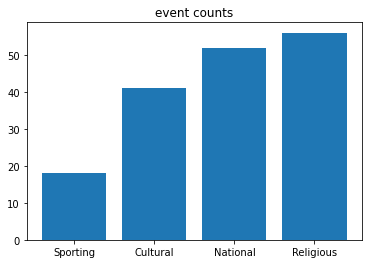

In [52]:
plt.bar(event_dic.keys(),event_dic.values())
plt.title('event counts')
plt.show()

Most of the events are Religious and National.

# Summary from calendar dataset
* From 1969 days there are 162 events (8.2% from total)
* Event are mostly Religious, National, Cultural while Sporting events are the least
* SNAP day in each State are distubuted equally at 650 days. However, it doesn't need to occur in the same day between different States. 